# Importar data y librerias.
## Para este entregable, decidi trabajar sobre la data de Ford Price Prediction.

In [14]:
#Importar librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set()

In [2]:
#Leo el Dataset y creo una copia

data = pd.read_csv("fordpriceprediction.csv")
df = data.copy()
df.columns = map(str.lower, df.columns) #convertimos las variables a minúsculas
df.head()

,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


# Analisis exploratorio.
En esta seccion utilizo diferentes comandos para entender mejor la estructura de la data

In [3]:
#Revisamos la integridad de la data. Parece que no hay nulls en nuestro dataset
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fueltype        0
tax             0
mpg             0
enginesize      0
dtype: int64

In [4]:
#Revisamos la estructura de la data.
df.shape

(17966, 9)

In [5]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fueltype', 'tax',
       'mpg', 'enginesize'],
      dtype='object')

In [6]:
#Podemos encontrar 3 variables categoricas: Modelo, Transmission y FuelType.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fueltype      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   enginesize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [7]:
df.describe()

,year,price,mileage,tax,mpg,enginesize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


# Tratamiento de variables categoricas
## En esta seccion trabajare sobre las variables categoricas (Model, Transmission y FuelType)

### 1. Model

In [8]:
data_disc = df[['model', 'transmission', 'fueltype']].copy()
data_disc.describe()

,model,transmission,fueltype
count,17966,17966,17966
unique,24,3,5
top,Fiesta,Manual,Petrol
freq,6557,15518,12179


<AxesSubplot:title={'center':'model Count'}>

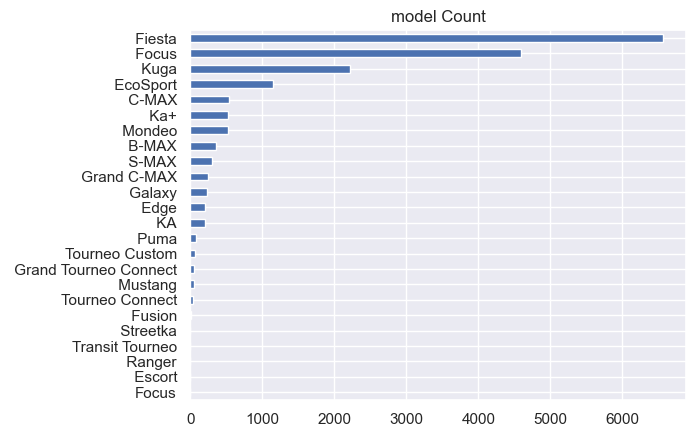

In [15]:
#Model - Bar chart

data_disc.model.value_counts().sort_values().plot(kind = 'barh', title = 'model Count')

In [16]:
#Debido a la alta cardinalidad, he decidido eliminar la columna Model del dataset

df.drop(['model'], inplace=True, axis=1)

### 2. Transmission

<AxesSubplot:title={'center':'Transmission Count'}>

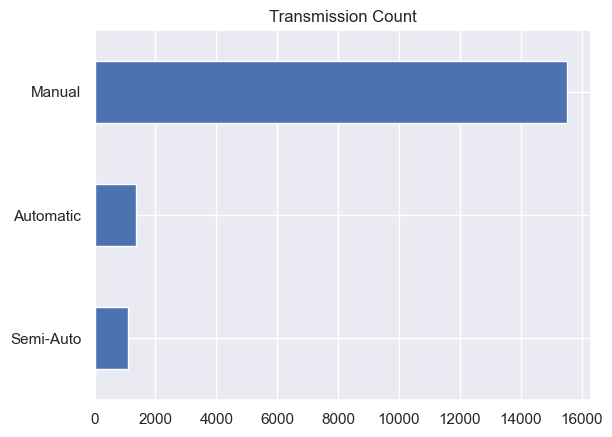

In [17]:
#Transmission - Bar chart
#Aqui no observamos nada fuera de lo normal.

data_disc.transmission.value_counts().sort_values().plot(kind = 'barh', title = 'Transmission Count')

In [18]:
#creamos un dummy para la columna transmission
dummy_transmision = pd.get_dummies(df['transmission'])
dummy_transmision.rename(columns={'Automatic':'transmission-automatic', 'Manual':'transmission-manual','Semi-Auto':'transmission-semi-auto'}, inplace=True)
df = pd.concat([df, dummy_transmision], axis=1)
df.drop(['transmission'], inplace=True, axis=1)
df

,year,price,mileage,fueltype,tax,mpg,enginesize,transmission-automatic,transmission-manual,transmission-semi-auto
0,2017,12000,15944,Petrol,150,57.7,1.0,1,0,0
1,2018,14000,9083,Petrol,150,57.7,1.0,0,1,0
2,2017,13000,12456,Petrol,150,57.7,1.0,0,1,0
3,2019,17500,10460,Petrol,145,40.3,1.5,0,1,0
4,2019,16500,1482,Petrol,145,48.7,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
17961,2017,8999,16700,Petrol,150,47.1,1.4,0,1,0
17962,2014,7499,40700,Petrol,30,57.7,1.0,0,1,0
17963,2015,9999,7010,Diesel,20,67.3,1.6,0,1,0
17964,2018,8299,5007,Petrol,145,57.7,1.2,0,1,0


### 3. FuelType

<AxesSubplot:title={'center':'FuelType Count'}>

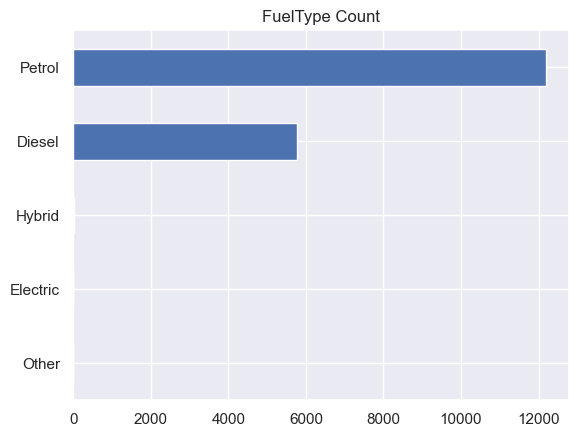

In [19]:
#FuelType - Bar chart


#Aqui encontramos que para esta variable, las ultimas categorias tienen muy pocos valores.
#Creo que lo mejor es eliminarlas ya que pueden dañar el modelo

data_disc.fueltype.value_counts().sort_values().plot(kind = 'barh', title = 'FuelType Count')

In [20]:
#Eliminamos las lineas que contienen Hybrid, Electric y Other de la columna
df.drop(df[df['fueltype'] == 'Hybrid'].index, inplace = True)
df.drop(df[df['fueltype'] == 'Electric'].index, inplace = True)
df.drop(df[df['fueltype'] == 'Other'].index, inplace = True)

<AxesSubplot:title={'center':'FuelType Count'}>

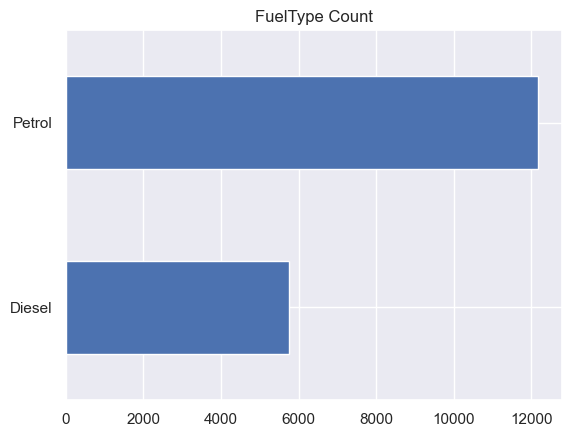

In [21]:
#Comprobamos que el cambio fuera efectivo
df.fueltype.value_counts().sort_values().plot(kind = 'barh', title = 'FuelType Count')

In [22]:
#Creamos un dummy variable para la columna fueltype
dummy_fueltype = pd.get_dummies(df['fueltype'])
dummy_fueltype.rename(columns={'Diesel':'fueltype-diesel', 'Petrol':'fueltype-petrol'}, inplace=True)
df = pd.concat([df, dummy_fueltype], axis=1)
df.drop(['fueltype'], inplace=True, axis=1)
df

,year,price,mileage,tax,mpg,enginesize,transmission-automatic,transmission-manual,transmission-semi-auto,fueltype-diesel,fueltype-petrol
0,2017,12000,15944,150,57.7,1.0,1,0,0,0,1
1,2018,14000,9083,150,57.7,1.0,0,1,0,0,1
2,2017,13000,12456,150,57.7,1.0,0,1,0,0,1
3,2019,17500,10460,145,40.3,1.5,0,1,0,0,1
4,2019,16500,1482,145,48.7,1.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,8999,16700,150,47.1,1.4,0,1,0,0,1
17962,2014,7499,40700,30,57.7,1.0,0,1,0,0,1
17963,2015,9999,7010,20,67.3,1.6,0,1,0,1,0
17964,2018,8299,5007,145,57.7,1.2,0,1,0,0,1


In [23]:
#Asi nos quedaria el dataset final con el tratamiento de variables categoricas
df

,year,price,mileage,tax,mpg,enginesize,transmission-automatic,transmission-manual,transmission-semi-auto,fueltype-diesel,fueltype-petrol
0,2017,12000,15944,150,57.7,1.0,1,0,0,0,1
1,2018,14000,9083,150,57.7,1.0,0,1,0,0,1
2,2017,13000,12456,150,57.7,1.0,0,1,0,0,1
3,2019,17500,10460,145,40.3,1.5,0,1,0,0,1
4,2019,16500,1482,145,48.7,1.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,8999,16700,150,47.1,1.4,0,1,0,0,1
17962,2014,7499,40700,30,57.7,1.0,0,1,0,0,1
17963,2015,9999,7010,20,67.3,1.6,0,1,0,1,0
17964,2018,8299,5007,145,57.7,1.2,0,1,0,0,1


# Tratamiento de variables numericas

In [24]:
data_num = df[['year', 'price', 'mileage', 'tax', 'mpg', 'enginesize']]
data_num

,year,price,mileage,tax,mpg,enginesize
0,2017,12000,15944,150,57.7,1.0
1,2018,14000,9083,150,57.7,1.0
2,2017,13000,12456,150,57.7,1.0
3,2019,17500,10460,145,40.3,1.5
4,2019,16500,1482,145,48.7,1.0
...,...,...,...,...,...,...
17961,2017,8999,16700,150,47.1,1.4
17962,2014,7499,40700,30,57.7,1.0
17963,2015,9999,7010,20,67.3,1.6
17964,2018,8299,5007,145,57.7,1.2


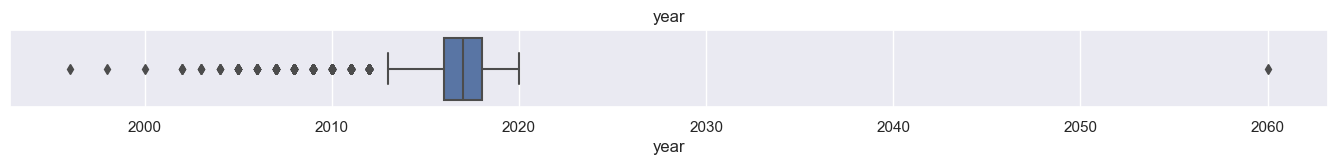

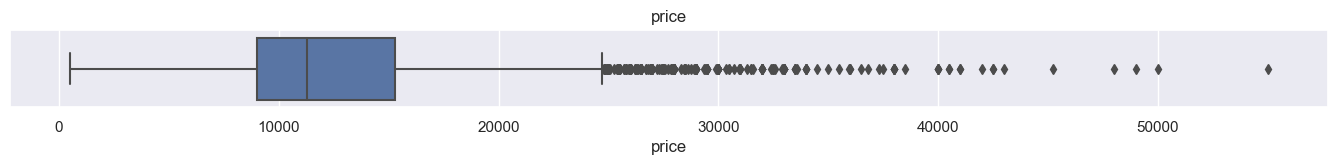

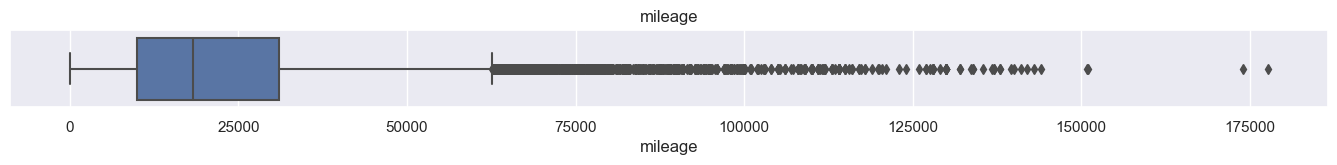

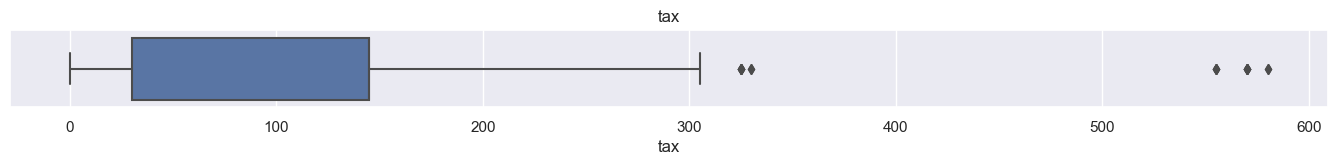

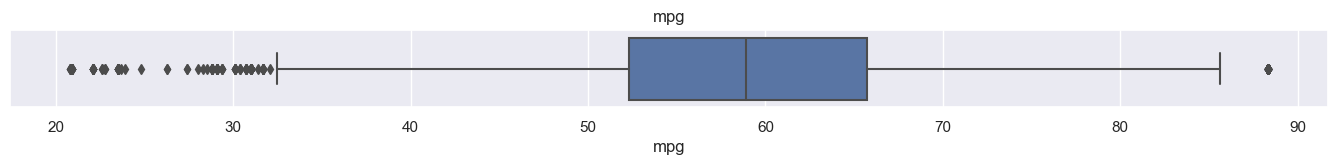

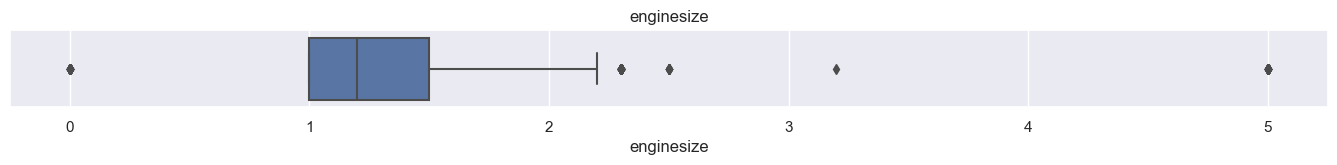

In [25]:
#Visualizamos las distribuciones de las variables numericas. Podemos observar un gran numero de outliers en Mileage y Year

for column in data_num:
        plt.figure(figsize=(17,1))
        plt.title(column)
        sns.boxplot(data=data_num, x=column)

In [26]:
#definción de la función que nos permitirá eliminar los outliers #codigo de la clase
#para cada variable (columna)
def eliminar_outlier(col): 
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lowerthr= Q1-(1.5 * IQR) #UMBRAL INFERIOR
    upperthr= Q3+(1.5 * IQR) #UMBRAL SUPERIOR
    return lowerthr,upperthr

In [27]:
for column in data_num.columns: #aplicamos la función eliminar_outlier para cada variable (columna) del dataframe
    if data_num[column].dtype != 'object': 
        lowerthr,upperthr=eliminar_outlier(data_num[column])
        data_num[column]=np.where(data_num[column]>upperthr,upperthr,data_num[column])
        data_num[column]=np.where(data_num[column]<lowerthr,lowerthr,data_num[column])

C:\Users\micha\AppData\Local\Temp\ipykernel_3476\3945530209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num[column]=np.where(data_num[column]>upperthr,upperthr,data_num[column])
C:\Users\micha\AppData\Local\Temp\ipykernel_3476\3945530209.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num[column]=np.where(data_num[column]<lowerthr,lowerthr,data_num[column])


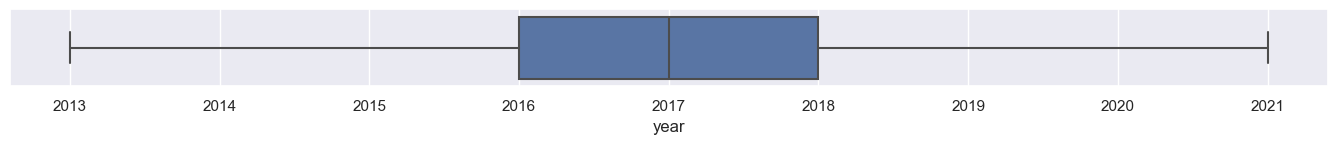

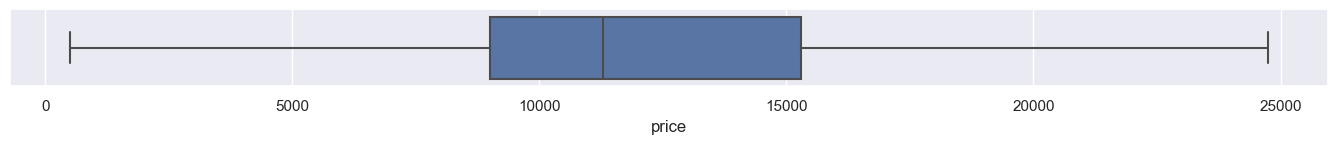

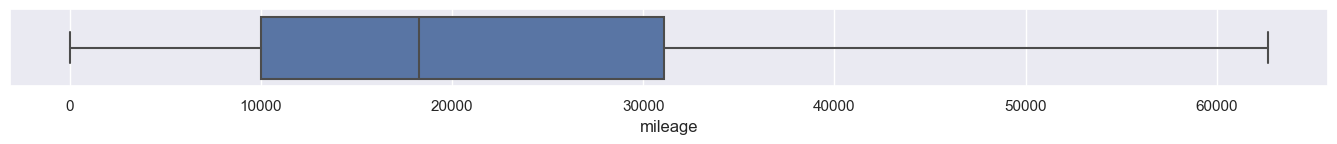

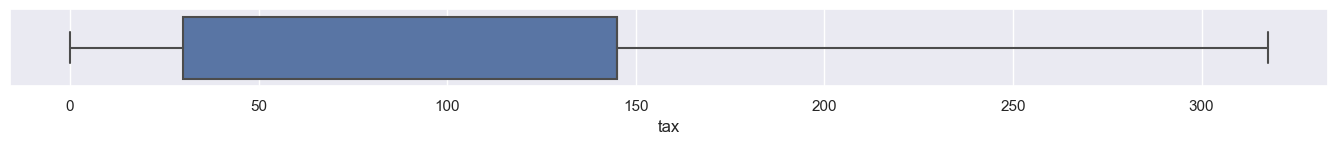

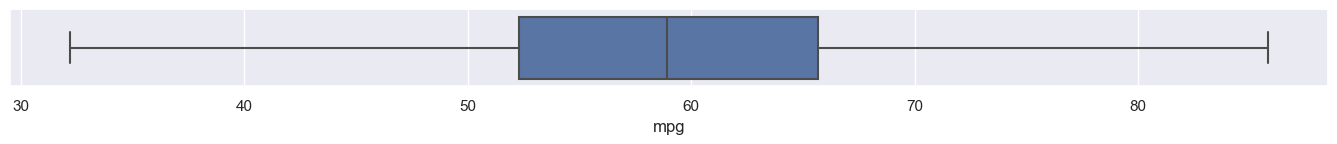

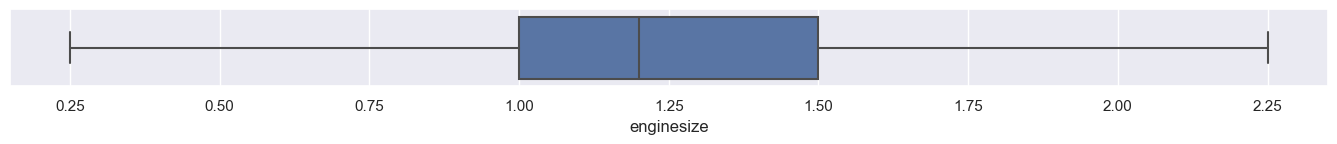

In [28]:
#Removemos outliers del dataset con variables numericas utilizando la funcion vista en clase.

for column in data_num:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=data_num, x=column)

In [29]:
#Creamos un dataset de correlacion sin tomar en cuenta el precio, ya que es la variable que deseamos predecir
corr = df.select_dtypes("number").drop(columns="price").corr() 
corr

,year,mileage,tax,mpg,enginesize,transmission-automatic,transmission-manual,transmission-semi-auto,fueltype-diesel,fueltype-petrol
year,1.000000,-0.708062,0.298129,-0.029038,-0.139098,0.035054,-0.036376,0.013520,-0.088320,0.088320
mileage,-0.708062,1.000000,-0.259468,0.127225,0.216147,-0.051171,0.060036,-0.029682,0.258059,-0.258059
tax,0.298129,-0.259468,1.000000,-0.518949,0.185852,0.158499,-0.184169,0.089371,-0.129454,0.129454
mpg,-0.029038,0.127225,-0.518949,1.000000,-0.279921,-0.251970,0.322916,-0.185295,0.305175,-0.305175
enginesize,-0.139098,0.216147,0.185852,-0.279921,1.000000,0.158393,-0.219877,0.140695,0.645421,-0.645421
transmission-automatic,0.035054,-0.051171,0.158499,-0.251970,0.158393,1.000000,-0.718535,-0.072052,0.061305,-0.061305
transmission-manual,-0.036376,0.060036,-0.184169,0.322916,-0.219877,-0.718535,1.000000,-0.641912,-0.101095,0.101095
transmission-semi-auto,0.013520,-0.029682,0.089371,-0.185295,0.140695,-0.072052,-0.641912,1.000000,0.077392,-0.077392
fueltype-diesel,-0.088320,0.258059,-0.129454,0.305175,0.645421,0.061305,-0.101095,0.077392,1.000000,-1.000000
fueltype-petrol,0.088320,-0.258059,0.129454,-0.305175,-0.645421,-0.061305,0.101095,-0.077392,-1.000000,1.000000


# Estandarizacion de los datos (Codigo utilizado de la clase)

In [30]:
dfestand=df.copy()
dfestand.columns

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'enginesize',
       'transmission-automatic', 'transmission-manual',
       'transmission-semi-auto', 'fueltype-diesel', 'fueltype-petrol'],
      dtype='object')

In [32]:
from sklearn.preprocessing import StandardScaler #importamos la librería para estandarizar

scalerX = StandardScaler()
lista_columnas=['year', 'mileage', 'tax', 'mpg', 'enginesize',
       'fueltype-diesel', 'fueltype-petrol',
       'transmission-automatic', 'transmission-manual',
       'transmission-semi-auto']
dfestand[lista_columnas] = scalerX.fit_transform(dfestand[lista_columnas])

In [33]:
scalerY = StandardScaler()

dfestand['price']=scalerY.fit_transform(np.array(dfestand['price']).reshape(len(dfestand['price']),1)).reshape(len(dfestand['price']))

# Creacion de las muestras de entrenamiento y test (Codigo de la clase)

In [34]:
X = dfestand.drop(['price'],axis=1).values
Y = dfestand['price'].values

In [35]:
from sklearn.model_selection import train_test_split #importamos la función para construir las muestras de entrenamiento y de test.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

In [36]:
[X_train.shape, Y_train.shape] #comprobamos las dimensiones de la muestra de train

[(12558, 10), (12558,)]

In [37]:
[X_test.shape, Y_test.shape] #comprobamos las dimensiones de la muestra de test

[(5383, 10), (5383,)]

# Construccion del modelo

In [38]:
from sklearn.linear_model import LinearRegression #Importamos la función regresión lineal
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error #Importamos la función MSE
#Obtención del modelo de regresión lineal para la muestra de entrenamiento
lr= LinearRegression() 
lr.fit(X_train, Y_train) #construcción del modelo a partir de los datos de entrenamiento.
#Cálculo de los valores predichos a partir de la muestra de entrenamiento
Y_train_pred= lr.predict(X_train)
#Cálculo de los valores predichos a partir de la muestra de test
Y_test_pred= lr.predict(X_test)

In [39]:
parametroslr=lr.coef_
parametroslr

array([ 4.96469269e-01, -2.57394709e-01,  9.49232226e-04, -2.70706481e-01,
        3.45659049e-01,  1.03877097e+11,  1.35119958e+11,  9.42196405e+10,
        2.98571098e+07,  2.98571096e+07])

In [40]:
lr.intercept_ #lr.intercept es prácticamente cero ya que hemos estandarizado todas las variables por lo que la función de distribución de todas ellas se encuentra centrada en el origen.

0.0014328104090779812

In [41]:
Y_test_pred2D= Y_test_pred.reshape(-1,1) # debemos hacer esta transformación de un array 1D a uno 2D para poder ejecutar inverse_tranform
Y_test_pred_inv = scalerY.inverse_transform(Y_test_pred2D)
print(Y_test_pred_inv)

[[15216.75664307]
 [16709.02635365]
 [16674.42537101]
 ...
 [ 9354.40728123]
 [ 9339.05888879]
 [11278.15562393]]


# Evaluación de la bondad del ajuste


In [42]:
def calculametricas(y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred) #Error absoluto medio (MAE)
    mse = metrics.mean_squared_error(y_test, y_pred) #Error cuadrático medio (MSE)
    rmse = math.sqrt(mse) #Error estándar de la estimación (RMSE)
    r2 = metrics.r2_score(y_test, y_pred) #Cálculo del coeficiente de determinación R2
    print("MAE : ",mae)
    print("MSE : ",mse)
    print("RMSE : ",rmse)
    print("R2 : ",r2)
    return mae,mse,rmse,r2

In [43]:
print('Métricas calculadas sobre la muestra de entrenamiento:')
metricasLR_train=calculametricas(Y_train, Y_train_pred)

Métricas calculadas sobre la muestra de entrenamiento:
MAE :  0.36845571879055994
MSE :  0.26158534067368056
RMSE :  0.5114541432755048
R2 :  0.7411549873510141


In [44]:
print('Métricas calculadas sobre la muestra de test:')
metricasLR_test=calculametricas(Y_test, Y_test_pred)

Métricas calculadas sobre la muestra de test:
MAE :  0.3652717396225297
MSE :  0.2438079959239867
RMSE :  0.4937691727153354
R2 :  0.7499983669259707


In [45]:
#Los indicadores parecen ser muy similares para las dos muestras mas sin embargo no demuestra sobreajuste.

dfmetricasLR_train=pd.DataFrame(metricasLR_train).rename(columns = {0:'train'})
dfmetricasLR_test=pd.DataFrame(metricasLR_test).rename(columns = {0:'test'})
dfmetricasLR_traintest=pd.concat([dfmetricasLR_train,dfmetricasLR_test], axis=1, ignore_index=True)
dfmetricasLR_traintest = dfmetricasLR_traintest.rename(columns = {0:'train',1:'test'},index={0: 'MAE',1:'MSE',2:'RMSE',3:'R2'})
dfmetricasLR_traintest

,train,test
MAE,0.368456,0.365272
MSE,0.261585,0.243808
RMSE,0.511454,0.493769
R2,0.741155,0.749998


### Diagrama de dispersión de los valores predichos frente a los valores reales (estandarizados)


In [46]:
sY_test = pd.Series(Y_test)
sY_test.name = 'Y_test'

In [47]:
sY_test_pred= pd.Series(Y_test_pred)
sY_test_pred.name = 'Y_test_pred'

In [48]:
dfYs = pd.concat([sY_test, sY_test_pred], axis=1)
dfYs.head()

,Y_test,Y_test_pred
0,1.133113,0.624403
1,0.874656,0.940281
2,0.895612,0.932957
3,-1.432831,-1.339214
4,-0.586125,-0.148701


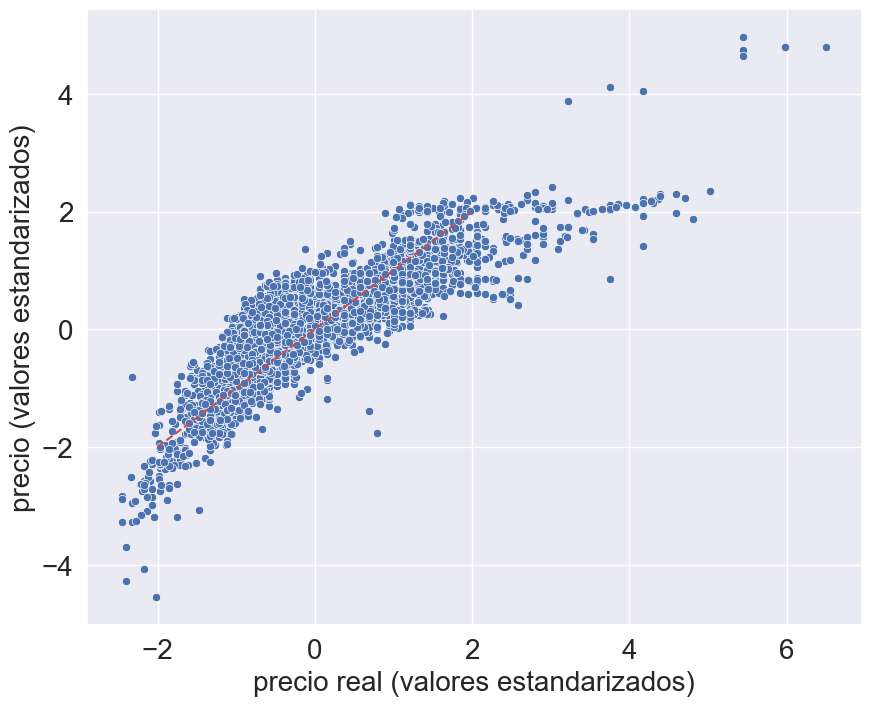

In [49]:
#Este grafico muestra como los datos predichos tienen una relacion lineal con las datos reales.
#Esto es un buen indicador, demuestra que el modelo se ha ajustado bien.

plt.figure(figsize=(10,8))
sns.scatterplot(data=dfYs, x="Y_test", y="Y_test_pred",color="b")
#--------------------código para el diseño del gráfico---------------------------------
plt.xlabel('precio real (valores estandarizados)', fontsize='20')
plt.ylabel('precio (valores estandarizados)', fontsize='20')
plt.plot([-2,2],[-2,2],'--r')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

## Diagrama de dispersión de los valores predichos frente a los valores reales (en las unidades de origen)

In [50]:
#Primero, invertimos la estandarizacion de los datos
Y_test_pred2D= Y_test_pred.reshape(-1,1) # debemos hacer esta transformación de un array 1D a uno 2D para poder ejecutar inverse_tranform

In [51]:
Y_test_pred_inv = scalerY.inverse_transform(Y_test_pred2D)
Y_test_pred_inv #mostramos en pantalla los valores predichos en las unidades originales.

array([[15216.75664307],
       [16709.02635365],
       [16674.42537101],
       ...,
       [ 9354.40728123],
       [ 9339.05888879],
       [11278.15562393]])

In [52]:
Y_test2D= Y_test.reshape(-1,1) # debemos hacer esta transformación de un array 1D a uno 2D para poder ejecutar inverse_tranform

In [53]:
Y_test_inv = scalerY.inverse_transform(Y_test2D)
Y_test_inv[:,0].shape

(5383,)

In [54]:
sY_test_inv = pd.Series(Y_test_inv[:,0]) #con Y_test_inv[:,0] convertimos el array 2D en 1D
sY_test_inv.name = 'Y_test_inv'

In [55]:
sY_test_pred_inv= pd.Series(Y_test_pred_inv[:,0])
sY_test_pred_inv.name = 'Y_test_pred_inv'

In [74]:
dfYinv = pd.concat([sY_test_inv, sY_test_pred_inv], axis=1)
dfYinv['Dif'] = np.abs(dfYinv.Y_test_pred_inv - dfYinv.Y_test_inv)

In [75]:
#Los valores predecidos son bastante certeros excepto para el grupo 0 y 4.

dfYinv.head()

,Y_test_inv,Y_test_pred_inv,Dif
0,17620.0,15216.756643,2403.243357
1,16399.0,16709.026354,310.026354
2,16498.0,16674.425371,176.425371
3,5498.0,5940.263448,442.263448
4,9498.0,11564.472962,2066.472962


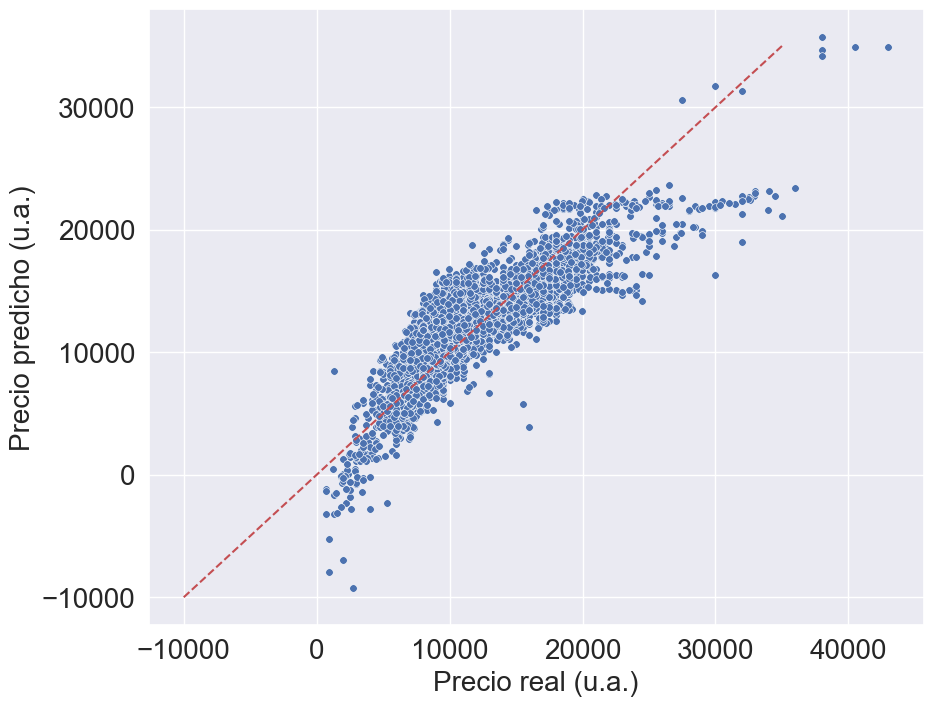

In [76]:
#Visualizacion de los datos sin estandarizar

plt.figure(figsize=(10,8))
sns.scatterplot(data=dfYinv, x="Y_test_inv", y="Y_test_pred_inv",color="b",s=30)
#--------------------código para el diseño del gráfico---------------------------------
plt.xlabel('Precio real (u.a.)', fontsize='20', zorder=0)
plt.ylabel('Precio predicho (u.a.)', fontsize='20', zorder=10)
plt.plot([-10000,35000],[-10000,35000],'--r')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# LinearRegression de Scikit Learn (k-fold CV)

In [77]:
from sklearn.model_selection import cross_val_score
#Para R2 tenemos un valor medio de 0.711, lo cual indica un buen nivel de correlacion!

cv_linear = cross_val_score(estimator = lr, X=X, y=Y, scoring='r2', cv = 5) #suelen seleccionarse valores de cv=[5,10]
print("Valores de R2 en cada división:", cv_linear) #valor de la métrica (scoring) obtenido cada vez 
print("R2 (valor medio) ", cv_linear.mean())
print("R2 (desviación estándar) ", cv_linear.std())

Valores de R2 en cada división: [0.72145782 0.73559697 0.73555868 0.74552479 0.61828329]
R2 (valor medio)  0.7112843074888364
R2 (desviación estándar)  0.047128441504797794


In [78]:
from sklearn.model_selection import cross_val_score
#Para RMSE
cv_linear = cross_val_score(estimator = lr, X=X, y=Y, scoring='neg_root_mean_squared_error', cv = 5) #suelen seleccionarse valores de cv=[5,10]
print("Valores de RMSE en cada división:", cv_linear) #valor de la métrica (scoring) obtenido cada vez 
print("RMSE (valor medio) ", cv_linear.mean())
print("RMSE (desviación estándar) ", cv_linear.std())

Valores de RMSE en cada división: [-0.50295577 -0.46378331 -0.4986704  -0.5424042  -0.61916494]
RMSE (valor medio)  -0.5253957251907025
RMSE (desviación estándar)  0.05309583153643617


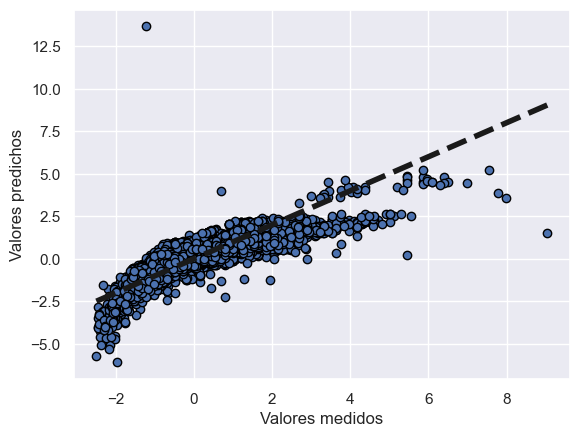

In [79]:
#Representacion grafica del RMSE 
from sklearn.model_selection import cross_val_predict
Ypredichos = cross_val_predict(lr, X, Y, cv=5)
fig, ax = plt.subplots()
ax.scatter(Y, Ypredichos, edgecolors=(0, 0, 0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], "k--", lw=4)
ax.set_xlabel("Valores medidos")
ax.set_ylabel("Valores predichos")
plt.show()

# Métodos no supervisados de selección de variables
### Matriz de correlacion

In [101]:
df = df[['year', 'mileage', 'tax', 'mpg', 'enginesize',
       'transmission-automatic', 'transmission-manual',
       'transmission-semi-auto', 'fueltype-diesel', 'fueltype-petrol', 'price']]
corr = df.corr(method='pearson') 
corr.head()

,year,mileage,tax,mpg,enginesize,transmission-automatic,transmission-manual,transmission-semi-auto,fueltype-diesel,fueltype-petrol,price
year,1.000000,-0.708062,0.298129,-0.029038,-0.139098,0.035054,-0.036376,0.013520,-0.088320,0.088320,0.635938
mileage,-0.708062,1.000000,-0.259468,0.127225,0.216147,-0.051171,0.060036,-0.029682,0.258059,-0.258059,-0.530973
tax,0.298129,-0.259468,1.000000,-0.518949,0.185852,0.158499,-0.184169,0.089371,-0.129454,0.129454,0.408074
mpg,-0.029038,0.127225,-0.518949,1.000000,-0.279921,-0.251970,0.322916,-0.185295,0.305175,-0.305175,-0.374257
enginesize,-0.139098,0.216147,0.185852,-0.279921,1.000000,0.158393,-0.219877,0.140695,0.645421,-0.645421,0.409226


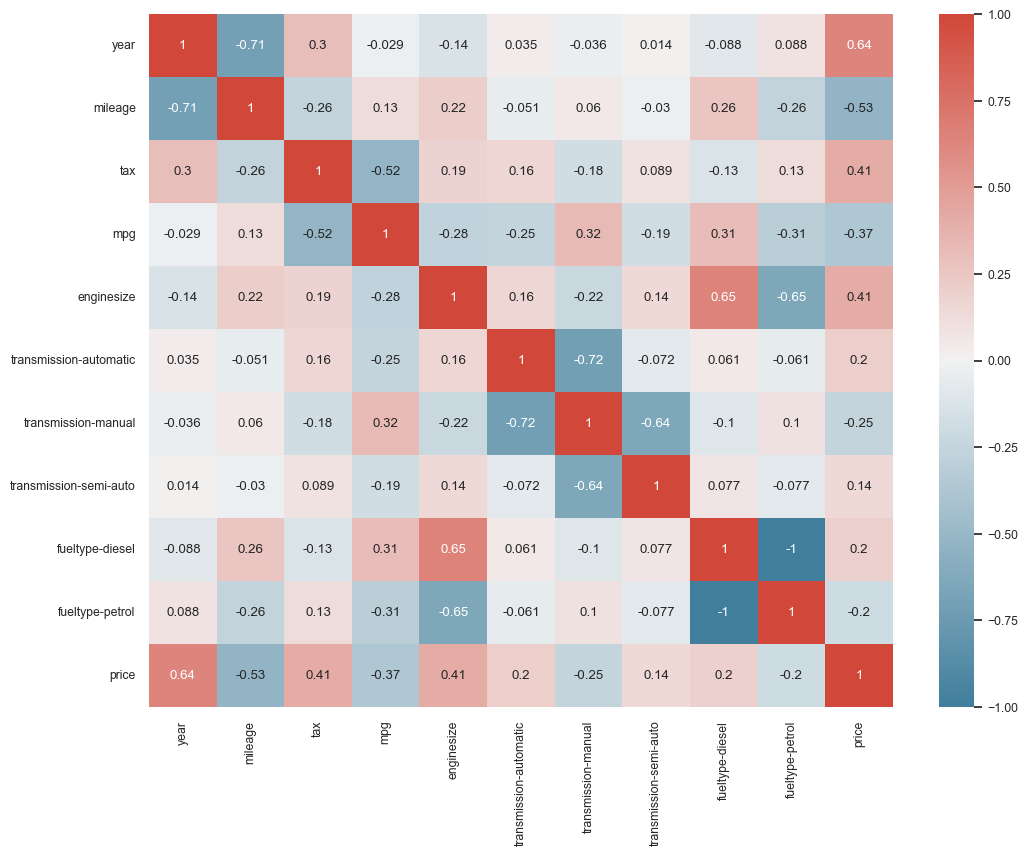

In [100]:
plt.figure(figsize=(12,9)) #seleccionamos un tamaño de imagen mayor
sns.set(font_scale=0.8) #seleccionamos un tamaño de letra legible
# preparación del gráfico definiendo un mapa de colores
cmap = sns.diverging_palette(230, 15, as_cmap=True)
# graficamos la correlación
sns.heatmap(corr, annot=True,  cmap=cmap)
plt.show()

In [102]:
triang_sup = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
triang_sup   

C:\Users\micha\AppData\Local\Temp\ipykernel_3476\3095359843.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  triang_sup = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


,year,mileage,tax,mpg,enginesize,transmission-automatic,transmission-manual,transmission-semi-auto,fueltype-diesel,fueltype-petrol,price
year,NaN,-0.708062,0.298129,-0.029038,-0.139098,0.035054,-0.036376,0.013520,-0.088320,0.088320,0.635938
mileage,NaN,NaN,-0.259468,0.127225,0.216147,-0.051171,0.060036,-0.029682,0.258059,-0.258059,-0.530973
tax,NaN,NaN,NaN,-0.518949,0.185852,0.158499,-0.184169,0.089371,-0.129454,0.129454,0.408074
mpg,NaN,NaN,NaN,NaN,-0.279921,-0.251970,0.322916,-0.185295,0.305175,-0.305175,-0.374257
enginesize,NaN,NaN,NaN,NaN,NaN,0.158393,-0.219877,0.140695,0.645421,-0.645421,0.409226
transmission-automatic,NaN,NaN,NaN,NaN,NaN,NaN,-0.718535,-0.072052,0.061305,-0.061305,0.203544
transmission-manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.641912,-0.101095,0.101095,-0.254652
transmission-semi-auto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.077392,-0.077392,0.140787
fueltype-diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,0.202702
fueltype-petrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.202702


In [103]:
# Imponemos el umbral seleccionado sobre la matriz de correlación.
# Ninguna variable es eliminada del modelo.
variablescorr_drop = [column for column in triang_sup.columns if any(triang_sup[column] > 0.9)]
print(variablescorr_drop)

[]


## Calculo del VIF (Codigo utilizado de la clase)

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Elimino las variables dummy ya que son binarias.
#Comentario: No se si esto sea lo correcto, lo intente correr con todas pero los valores me dan error entonces preferi no_
#tomarlas en cuenta para el calculo del VIF, quedo atento si esto es lo correcto o no profesora!

dfvif = df.drop(['price', 'fueltype-diesel', 'fueltype-petrol', 'transmission-manual',
       'transmission-semi-auto', 'transmission-automatic'], axis=1) #eliminamos la columna de la variable respuesta Y.
dfvif.shape[1] #hacemos la comprobación

5

In [107]:
def estandariza(data_features):
    data_features = (data_features - data_features.mean()) /   data_features.std()
    return data_features

In [108]:
dfvif_estan = dfvif.apply(estandariza, axis=0)
dfvif_estan.head()

,year,mileage,tax,mpg,enginesize
0,0.065873,-0.381433,0.590914,-0.017031,-0.810632
1,0.553630,-0.734108,0.590914,-0.017031,-0.810632
2,0.065873,-0.560726,0.590914,-0.017031,-0.810632
3,1.041387,-0.663326,0.510268,-1.785553,0.347829
4,1.041387,-1.124820,0.510268,-0.931783,-0.810632


In [109]:
#En este paso calculamos el coeficiente VIF para las variables predictoras.

vif_estan = [[dfvif_estan.columns[i], variance_inflation_factor(dfvif_estan.to_numpy(), i)] for i in range(dfvif.shape[1])]
df_vif_estan=pd.DataFrame(vif_estan)  
df_vif_estan=df_vif_estan.rename(columns = {0:'Variable',1:'VIF'})
df_vif_estan  

,Variable,VIF
0,year,2.153080
1,mileage,2.160543
2,tax,1.555557
3,mpg,1.503278
4,enginesize,1.183340


In [110]:
#No obtenemos ningun valor mayor a 5, por lo que es seguro asumir que no debemos de eliminar ninguna de las variables predictoras.

df_vif_estan.sort_values(by=['VIF'],ascending=True)

,Variable,VIF
4,enginesize,1.183340
3,mpg,1.503278
2,tax,1.555557
0,year,2.153080
1,mileage,2.160543


# Métodos supervisados de selección de variables predictoras

## Clase SelectKBest (r_regression)

In [116]:
from sklearn.feature_selection import r_regression, SelectKBest
rselect = SelectKBest(r_regression, k=5) # Seleccionamos las mejores 5 variables predictoras
rselect.fit_transform(X, Y)
rselect.transform(X).shape #comprobamos el número k en la posición del número de columnas

(17941, 5)

In [117]:
rfilter = rselect.get_support(indices=True)
print(rfilter)

[0 2 4 5 8]


In [118]:
#Utilizando esta funcion de seleccion de variables, se han seleccionado las 5 variables que mas influyen en el modelo.
#Tiene sentido que estas variables afecten el precio de los automoviles. Sabemos que el año, el tipo de combustible _
#y la transmision afectan de gran manera a la hora de comprar un auto.

dflista_columnas=pd.DataFrame(lista_columnas)
dflista_columnas=dflista_columnas.rename(columns={0:'Variable predictora'})
dfKBest_r=dflista_columnas.iloc[rfilter, 0]
dfKBest_r

0                   year
2                    tax
4             enginesize
5        fueltype-diesel
8    transmission-manual
Name: Variable predictora, dtype: object

## Selección univariante: Test *F*

In [119]:
from sklearn.feature_selection import f_regression
f_values, p_values = f_regression(X, Y)
#psorted_values = p_values.sort()
#fsorted_values = f_values.sort()
print(p_values)
print(f_values)

[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 4.36217476e-167 1.58203933e-263 4.35434213e-080
 1.07410804e-165 1.07410804e-165]
[12181.06959266  7043.33500702  3584.12269229  2921.96343097
  3608.47048089   775.34010275  1243.96532491   362.75958604
   768.6656044    768.6656044 ]


Text(0, 0.5, 'Valor de F')

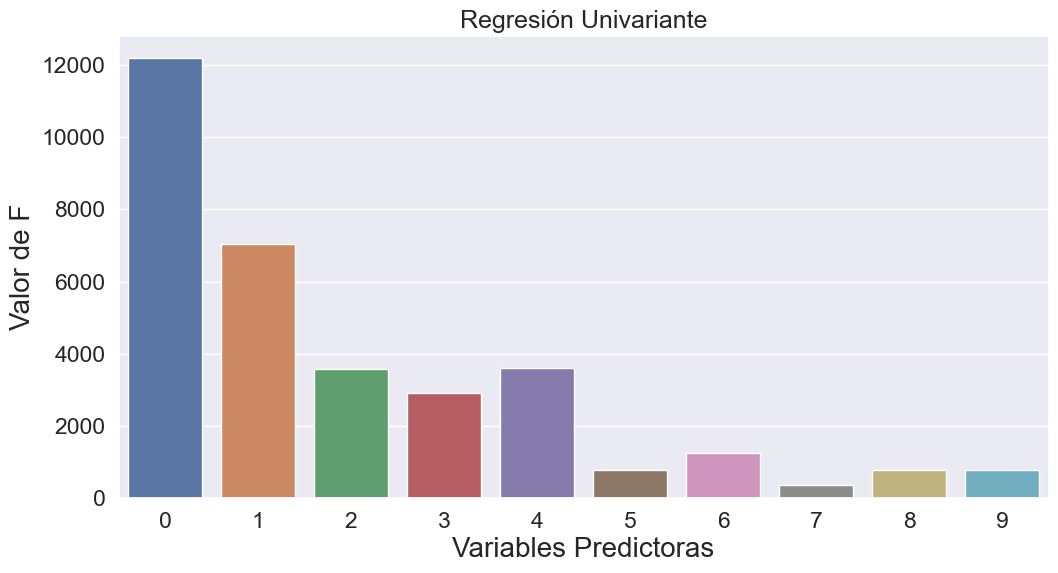

In [120]:
fig, ax = plt.subplots(figsize = (12 , 6))
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax = sns.barplot(x=np.arange(len(f_values)), y=f_values).set(title='Regresión Univariante')
plt.xlabel('Variables Predictoras')
plt.ylabel('Valor de F')

## Clase SelectKBest (f_regression)

In [121]:
from sklearn.feature_selection import SelectKBest
fselect = SelectKBest(f_regression, k=5) # Seleccionamos las mejores 5 variables predictoras
fselect.fit_transform(X,Y)
fselect.transform(X).shape

(17941, 5)

In [122]:
ffilter = fselect.get_support(indices=True)
print(ffilter)

[0 1 2 3 4]


In [123]:
#Este metodo nos selecciona 5 variables predictoras muy difrentes a las obtuvimos en la funcion de r_regression anteriormente 
dfKBest_f=dflista_columnas.iloc[ffilter, 0]
dfKBest_f

0          year
1       mileage
2           tax
3           mpg
4    enginesize
Name: Variable predictora, dtype: object

## Selección secuencial de variables predictoras (SFS)

In [127]:
from sklearn.feature_selection import SequentialFeatureSelector
lr= LinearRegression() 
sfs = SequentialFeatureSelector(lr, n_features_to_select=5, scoring= 'r2', direction='backward') #NB: direction{‘forward’, ‘backward’}, default=’forward’
sfs.fit(X, Y)
sfs.transform(X).shape

(17941, 5)

In [128]:
sfsfilter = sfs.get_support(indices=True)
print(sfsfilter)

[0 1 3 4 9]


In [129]:
dfsfs=dflista_columnas.iloc[sfsfilter, 0]
dfsfs

0                      year
1                   mileage
3                       mpg
4                enginesize
9    transmission-semi-auto
Name: Variable predictora, dtype: object

## Eliminación recursiva de variables (RFE)

In [130]:
from sklearn.feature_selection import RFE
lr= LinearRegression()
rfe= RFE(lr, n_features_to_select=5, step=1)
rfe.fit(X, Y)
rfe.transform(X).shape

(17941, 5)

In [131]:
rfefilter = rfe.get_support(indices=True)
print(rfefilter)

[0 1 3 4 9]


In [132]:
dfrfe=dflista_columnas.iloc[rfefilter, 0]
dfrfe

0                      year
1                   mileage
3                       mpg
4                enginesize
9    transmission-semi-auto
Name: Variable predictora, dtype: object

In [133]:
from sklearn.feature_selection import RFECV
lr= LinearRegression()
rfecv = RFECV(lr, step=1, min_features_to_select=5, cv=10)
rfecv.fit(X, Y)
rfecv.transform(X).shape

(17941, 7)

In [134]:
rfecvfilter = rfecv.get_support(indices=True)
print(rfecvfilter)

[0 1 3 4 6 8 9]


In [135]:
dfrfecv=dflista_columnas.iloc[rfecvfilter, 0]
dfrfecv

0                      year
1                   mileage
3                       mpg
4                enginesize
6           fueltype-petrol
8       transmission-manual
9    transmission-semi-auto
Name: Variable predictora, dtype: object

# Técnicas de regularización

### Regression Ridge

In [111]:
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha=1, solver = 'auto', random_state = 9) #Si selecionamos alpha = 0 se correspondería con una regresión lineal sin penalización
ridge=ridge_regression.fit(X_train, Y_train)
print("Los parámetros de la regresión de Ridge son\n", ridge.coef_) #Comprobamos el peso que se asigna a las distintas variables predictoras
Y_train_pred_ridge = ridge_regression.predict(X_train)
Y_test_pred_ridge = ridge_regression.predict(X_test)
###############Cálculo de las métricas#######################
print("Métricas calculadas sobre la muestra de entrenamiento")
metricasRidge_train=calculametricas(Y_train, Y_train_pred_ridge)
print("Métricas calculadas sobre la muestra de test")
metricasRidge_test=calculametricas(Y_test, Y_test_pred_ridge)

Los parámetros de la regresión de Ridge son
 [ 0.49640812 -0.25739481  0.00099191 -0.27067158  0.34562222  0.02452385
 -0.01999141  0.00163206  0.08608778 -0.08608778]
Métricas calculadas sobre la muestra de entrenamiento
MAE :  0.36847207642938384
MSE :  0.2615864776999929
RMSE :  0.5114552548366209
R2 :  0.7411538622360156
Métricas calculadas sobre la muestra de test
MAE :  0.3652848838863504
MSE :  0.2438076694950595
RMSE :  0.49376884216712125
R2 :  0.7499987016474166


### Regression Lasso

In [112]:
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=0.01, random_state = 8) 
lasso=lasso_regression.fit(X_train, Y_train)
print("Los parámetros de la regresión de Lasso son\n", lasso.coef_) #Comprobamos el peso que se asigna a las distintas variables predictoras
Y_train_pred_lasso = lasso_regression.predict(X_train)
Y_test_pred_lasso = lasso_regression.predict(X_test)
###############Cálculo de las métricas#######################
print("Métricas calculadas sobre la muestra de entrenamiento")
metricasLasso_train=calculametricas(Y_train, Y_train_pred_lasso)
print("Métricas calculadas sobre la muestra de test")
metricasLasso_test=calculametricas(Y_test, Y_test_pred_lasso)

Los parámetros de la regresión de Lasso son
 [ 0.49285493 -0.24845066  0.         -0.25501521  0.35253491  0.01745436
 -0.02269882  0.          0.15052296 -0.        ]
Métricas calculadas sobre la muestra de entrenamiento
MAE :  0.3679575233521046
MSE :  0.26207463481114623
RMSE :  0.5119322560760811
R2 :  0.7406708189841049
Métricas calculadas sobre la muestra de test
MAE :  0.36499384068923973
MSE :  0.24455732608575234
RMSE :  0.4945273764775337
R2 :  0.749230000968804


# Importancia de las variables predictoras de los modelos

In [113]:
dflrcoef=pd.DataFrame(parametroslr)
dfridgecoef=pd.DataFrame(ridge.coef_)
dflassocoef=pd.DataFrame(lasso.coef_)
dflrcoef=dflrcoef.rename(columns = {0:'Parámetro_lr'})
dfridgecoef=dfridgecoef.rename(columns = {0:'Parámetro_ridge'})
dflassocoef=dflassocoef.rename(columns = {0:'Parámetro_lasso'})
dfcoeficientes=dflrcoef.join(dflassocoef).join(dfridgecoef)
dfcoeficientes= dfcoeficientes.rename_axis('Variable').reset_index()
dfcoeficientes

,Variable,Parámetro_lr,Parámetro_lasso,Parámetro_ridge
0,0,4.964693e-01,0.492855,0.496408
1,1,-2.573947e-01,-0.248451,-0.257395
2,2,9.492322e-04,0.000000,0.000992
3,3,-2.707065e-01,-0.255015,-0.270672
4,4,3.456590e-01,0.352535,0.345622
5,5,1.038771e+11,0.017454,0.024524
6,6,1.351200e+11,-0.022699,-0.019991
7,7,9.421964e+10,0.000000,0.001632
8,8,2.985711e+07,0.150523,0.086088
9,9,2.985711e+07,-0.000000,-0.086088


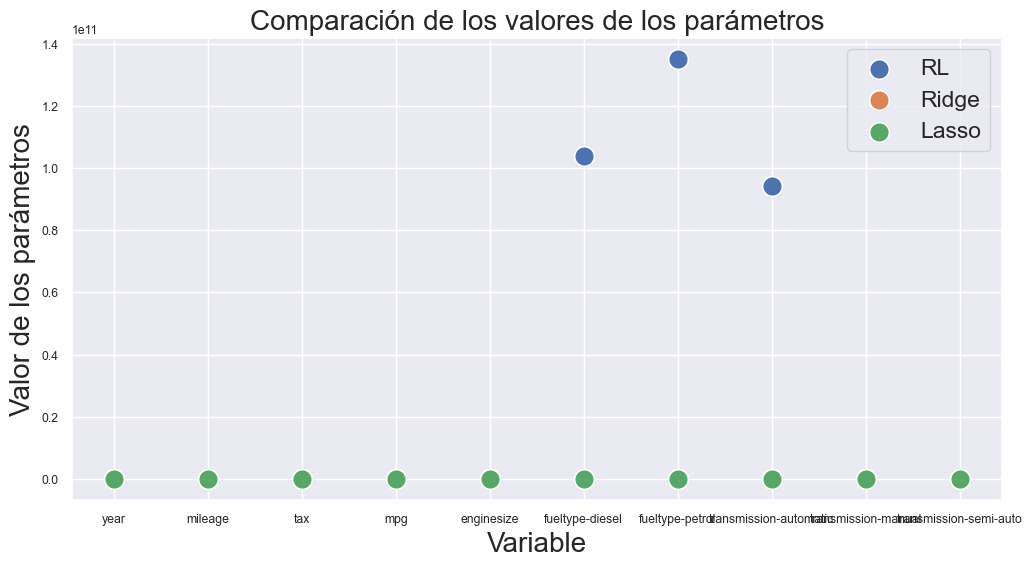

In [114]:
#Aqui no he entendido por que la regression de Lasso me da valores de 0 para todas las variables?
#Si pudiera explicarme esta parte, se lo agradeceria profe!

fig, ax = plt.subplots(figsize = (12 , 6))
sns.set(font_scale=1.5)
sns.scatterplot(data=dfcoeficientes, x='Variable', y='Parámetro_lr',legend='full',palette='bright',s=200)
sns.scatterplot(data=dfcoeficientes, x='Variable', y='Parámetro_lasso',legend='full',palette='bright',s=200)
sns.scatterplot(data=dfcoeficientes, x='Variable', y='Parámetro_ridge',legend='full',palette='bright',s=200)
ax.set_title( "Comparación de los valores de los parámetros" , size = 20)
ax.set_xlabel('Variable',size=20)
ax.set_ylabel('Valor de los parámetros',size=20)
ax.legend(loc='upper right', labels=['RL', 'Ridge','Lasso'])
ax.set_xticks(range(len(lista_columnas)))
ax.set_xticklabels(lista_columnas)
plt.show()

### Estudio comparativo de las metricas

In [115]:
dfmetricasLR_test=pd.DataFrame(metricasLR_test)
dfmetricasRidge_test=pd.DataFrame(metricasRidge_test)
dfmetricasLasso_test=pd.DataFrame(metricasLasso_test)
dfmetricasLRRL_test=pd.concat([dfmetricasLR_test, dfmetricasRidge_test, dfmetricasLasso_test],axis=1,ignore_index=True)
dfmetricasLRRL_test = dfmetricasLRRL_test.rename(columns = {0:'LR',1:'Ridge',2:'Lasso'},index={0: 'MAE',1:'MSE',2:'RMSE',3:'R2'})
dfmetricasLRRL_test

,LR,Ridge,Lasso
MAE,0.365272,0.365285,0.364994
MSE,0.243808,0.243808,0.244557
RMSE,0.493769,0.493769,0.494527
R2,0.749998,0.749999,0.749230


# Ejercicios

#### 1. Escribir el modelo resultante de la regresión lineal sin regularización y los modelos obtenidos con las regresiones con regularización de Ridge y Lasso considerando todas las variables predictoras del problema. Comparar los modelos e interpretarlos a partir de las métricas y las técnicas validación gráfica.

R/ Basado en los resultados de la tabla de abajo, podemos observar que en los 3 modelos obtuvimos indicadores muy similares.
Yo opino que no hay mucha diferencia y podriamos utilizar cualquiera de los 3 dado que se han ajustado bastante bien.


In [137]:
dfmetricasLRRL_test

,LR,Ridge,Lasso
MAE,0.365272,0.365285,0.364994
MSE,0.243808,0.243808,0.244557
RMSE,0.493769,0.493769,0.494527
R2,0.749998,0.749999,0.749230


#### 2. Ensayar otros valores de `k` o `n_features_to_select` en los siguientes métodos supervisados de selección de variables:


#### *   SelectKBest (r_regresion y f_regression).
#### *   Selección secuencial, SFS (backward y forward).
#### *   Eliminación recursiva, RFE y RFECV.

R/ Estos han sido calculados anteriormente en este workbook.

#### 3.  Construir una tabla comparativa con los resultados obtenidos mediante las distintas técnicas de selección de variables no supervisadas y supervisadas. Interpretar los resultados.

R/ Para los metodos no supervisados, la matriz de correlacion me indica que no debo de eliminar ninguna de las variables predictoras ya que todas poseen cierto valor significativo. Es importante recalcar que el umbral para la eliminacion de las variables era 0.9. Talves al tener tantas variables hubiera sido mejor bajar un poco el umbral aunque no lo veo necesario.

Al igual que con la matriz de correlacion, los valores en el calculo del VIF estan por debajo del 0.5 por lo que utilizando este indicador no se eliminaria ninguna variable predictora (Ver la tabla de abajo). Sin embargo, para este calculo no inclui las dummy variables porque me daba error el calculo, honesamente no super como incluirlas y por esto no creo que me fiaria de utilizar esta funcion.

In [157]:
#Tabla comparativa de metodos supervisados

df_vif_estan.sort_values(by=['VIF'],ascending=True)
dfKBest_r = pd.DataFrame(dfKBest_r)
dfKBest_r.rename(columns={'Variable predictora':'Variable predictora-KBest_r'}, inplace=True)
dfKBest_f = pd.DataFrame(dfKBest_f)
dfKBest_f.rename(columns={'Variable predictora':'Variable predictora-KBest_f'}, inplace=True)
dfsfs = pd.DataFrame(dfsfs)
dfsfs.rename(columns={'Variable predictora':'Variable predictora-SFS'}, inplace=True)
respuesta3 = pd.concat([df_vif_estan, dfKBest_r, dfKBest_f, dfsfs], axis=1)
respuesta3

,Variable,VIF,Variable predictora-KBest_r,Variable predictora-KBest_f,Variable predictora-SFS
0,year,2.153080,year,year,year
1,mileage,2.160543,NaN,mileage,mileage
2,tax,1.555557,tax,tax,NaN
3,mpg,1.503278,NaN,mpg,mpg
4,enginesize,1.183340,enginesize,enginesize,enginesize
5,NaN,NaN,fueltype-diesel,NaN,NaN
8,NaN,NaN,transmission-manual,NaN,NaN
9,NaN,NaN,NaN,NaN,transmission-semi-auto


En la tabla tambien podemos apreciar cuales variables eleccionaron cada metodo supervisado de seleccion de variables. 
Basado en esto, elegiria las que mas se repiten entre los 3 modelos, siendo estos:
-Year
-Mileage
-mpg
-engineSize

Y me quedaria una variable tentativa. Me parece curioso que estos modelos no consideren las dummy variables como significativas, de hecho los 3 modelos supervisados ignoraron la variable de "fueltype-petrol". (Talves porque habia mucha mas cantidad de carros de este tipo en comparacion a los de Diesel?)


#### 4. Evaluar los métodos de regularización para diferentes valores de $\lambda$ y construir una tabla comparativa donde se evalúen la importancia de las variables predictoras y las métricas. Seleccionar el modelo óptimo (LR, Ridge o Lasso) y razonar la elección.


Al comparar los resultados entre los modelos Lasso, Ridge y LR, he obtneido resultados muy similares entre los 3.
Honestamente, no se cual elegiria y no se si tuviera mucho impacto ya que los 3 modelos dan resultados muy similares.

#### 5. Construir los modelos de regresión (sin y con regularización) a partir del dataframe con el número de variables predictoras óptimas. Escribir el modelo resultante de la regresión lineal sin regularización y los modelos obtenidos con las regresiones con regularización de Ridge y Lasso. Comparar los modelos e interpretarlos a partir de las métricas y las técnicas validación gráfica.

In [194]:
#Creo el dataset con las 5 variables que elegi basandome en el metodo supervisado de seleccion de variables
dfestand_answer = dfestand[['year', 'mileage', 'mpg', 'enginesize',
       'fueltype-diesel', 'price']].copy()
dfestand_answer

,year,mileage,mpg,enginesize,fueltype-diesel,price
0,0.065875,-0.381444,-0.017031,-0.810654,-0.687830,-0.056510
1,0.553645,-0.734128,-0.017031,-0.810654,-0.687830,0.366844
2,0.065875,-0.560742,-0.017031,-0.810654,-0.687830,0.155167
3,1.041416,-0.663345,-1.785602,0.347838,-0.687830,1.107712
4,1.041416,-1.124852,-0.931809,-0.810654,-0.687830,0.896035
...,...,...,...,...,...,...
17961,0.065875,-0.342582,-1.094437,0.116140,-0.687830,-0.691751
17962,-1.397435,0.891120,-0.017031,-0.810654,-0.687830,-1.009266
17963,-0.909665,-0.840689,0.958732,0.579537,1.453849,-0.480075
17964,0.553645,-0.943652,-0.017031,-0.347257,-0.687830,-0.839925


In [198]:
X_train,X_test,Y_train,Y_test = train_test_split(X_answer,Y_answer,random_state=0,test_size=0.3)
X_answer = dfestand_answer.drop(['price'],axis=1).values
Y_answer = dfestand_answer['price'].values

In [201]:
[X_train.shape, Y_train.shape] #comprobamos las dimensiones de la muestra de train (5 variables)

[(5383, 5), (5383,)]

In [200]:
[X_test.shape, Y_test.shape] #comprobamos las dimensiones de la muestra de test (5 variables)

[(5383, 5), (5383,)]

#### LR

In [204]:
#Obtención del modelo de regresión lineal para la muestra de entrenamiento
lr= LinearRegression() 
lr.fit(X_train, Y_train) #construcción del modelo a partir de los datos de entrenamiento.
#Cálculo de los valores predichos a partir de la muestra de entrenamiento
Y_train_pred= lr.predict(X_train)
#Cálculo de los valores predichos a partir de la muestra de test
Y_test_pred= lr.predict(X_test)

In [205]:
parametroslr=lr.coef_
parametroslr

array([ 0.49641938, -0.26016666, -0.28828021,  0.34284587,  0.1838061 ])

In [207]:
Y_test_pred2D= Y_test_pred.reshape(-1,1) # debemos hacer esta transformación de un array 1D a uno 2D para poder ejecutar inverse_tranform
Y_test_pred_inv = scalerY.inverse_transform(Y_test_pred2D)
print(Y_test_pred_inv)

[[14604.49507369]
 [16764.28097004]
 [16520.47422834]
 ...
 [ 9322.90073404]
 [ 9334.30716237]
 [11343.71730813]]


In [209]:
print('Métricas calculadas sobre la muestra de entrenamiento:')
metricasLR_train=calculametricas(Y_train, Y_train_pred)

Métricas calculadas sobre la muestra de entrenamiento:
MAE :  0.36962565111798973
MSE :  0.26307306972657474
RMSE :  0.5129064921860268
R2 :  0.7396828435201601


In [210]:
print('Métricas calculadas sobre la muestra de test:')
metricasLR_test=calculametricas(Y_test, Y_test_pred)

Métricas calculadas sobre la muestra de test:
MAE :  0.36660095859990677
MSE :  0.24585237092450157
RMSE :  0.49583502389857614
R2 :  0.7479020571359352


In [211]:
#Utilizando solo 5 columnas, los indicadores varian un poco en relacion al modelo que utiliza todas las variables.
dfmetricasLR_train=pd.DataFrame(metricasLR_train).rename(columns = {0:'train'})
dfmetricasLR_test=pd.DataFrame(metricasLR_test).rename(columns = {0:'test'})
dfmetricasLR_traintest=pd.concat([dfmetricasLR_train,dfmetricasLR_test], axis=1, ignore_index=True)
dfmetricasLR_traintest = dfmetricasLR_traintest.rename(columns = {0:'train',1:'test'},index={0: 'MAE',1:'MSE',2:'RMSE',3:'R2'})
dfmetricasLR_traintest

,train,test
MAE,0.369626,0.366601
MSE,0.263073,0.245852
RMSE,0.512906,0.495835
R2,0.739683,0.747902


#### RIDGE

In [212]:
ridge_regression = Ridge(alpha=1, solver = 'auto', random_state = 9) #Si selecionamos alpha = 0 se correspondería con una regresión lineal sin penalización
ridge=ridge_regression.fit(X_train, Y_train)
print("Los parámetros de la regresión de Ridge son\n", ridge.coef_) #Comprobamos el peso que se asigna a las distintas variables predictoras
Y_train_pred_ridge = ridge_regression.predict(X_train)
Y_test_pred_ridge = ridge_regression.predict(X_test)
###############Cálculo de las métricas#######################
print("Métricas calculadas sobre la muestra de entrenamiento")
metricasRidge_train=calculametricas(Y_train, Y_train_pred_ridge)
print("Métricas calculadas sobre la muestra de test")
metricasRidge_test=calculametricas(Y_test, Y_test_pred_ridge)

Los parámetros de la regresión de Ridge son
 [ 0.49637037 -0.26017672 -0.28825947  0.34282774  0.1837949 ]
Métricas calculadas sobre la muestra de entrenamiento
MAE :  0.3696253003863817
MSE :  0.26307307259046997
RMSE :  0.5129064949778566
R2 :  0.7396828406862666
Métricas calculadas sobre la muestra de test
MAE :  0.3666016354441074
MSE :  0.2458542623283146
RMSE :  0.49583693118636757
R2 :  0.7479001176833742


#### LASSO

In [213]:
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=0.01, random_state = 8) 
lasso=lasso_regression.fit(X_train, Y_train)
print("Los parámetros de la regresión de Lasso son\n", lasso.coef_) #Comprobamos el peso que se asigna a las distintas variables predictoras
Y_train_pred_lasso = lasso_regression.predict(X_train)
Y_test_pred_lasso = lasso_regression.predict(X_test)
###############Cálculo de las métricas#######################
print("Métricas calculadas sobre la muestra de entrenamiento")
metricasLasso_train=calculametricas(Y_train, Y_train_pred_lasso)
print("Métricas calculadas sobre la muestra de test")
metricasLasso_test=calculametricas(Y_test, Y_test_pred_lasso)

Los parámetros de la regresión de Lasso son
 [ 0.49252042 -0.25099331 -0.27055817  0.34987333  0.16116926]
Métricas calculadas sobre la muestra de entrenamiento
MAE :  0.36909960852171814
MSE :  0.26353759040295965
RMSE :  0.5133591242034757
R2 :  0.7392231890913419
Métricas calculadas sobre la muestra de test
MAE :  0.36634546405359364
MSE :  0.24652666799494202
RMSE :  0.49651451942006897
R2 :  0.7472106303919177


In [216]:
dflrcoef=pd.DataFrame(parametroslr)
dfridgecoef=pd.DataFrame(ridge.coef_)
dflassocoef=pd.DataFrame(lasso.coef_)
dflrcoef=dflrcoef.rename(columns = {0:'Parámetro_lr'})
dfridgecoef=dfridgecoef.rename(columns = {0:'Parámetro_ridge'})
dflassocoef=dflassocoef.rename(columns = {0:'Parámetro_lasso'})
dfcoeficientes=dflrcoef.join(dflassocoef).join(dfridgecoef)
dfcoeficientes= dfcoeficientes.rename_axis('Variable').reset_index()
dfcoeficientes

,Variable,Parámetro_lr,Parámetro_lasso,Parámetro_ridge
0,0,0.496419,0.492520,0.496370
1,1,-0.260167,-0.250993,-0.260177
2,2,-0.288280,-0.270558,-0.288259
3,3,0.342846,0.349873,0.342828
4,4,0.183806,0.161169,0.183795


In [219]:
dfmetricasLR_test=pd.DataFrame(metricasLR_test)
dfmetricasRidge_test=pd.DataFrame(metricasRidge_test)
dfmetricasLasso_test=pd.DataFrame(metricasLasso_test)
dfmetricasLRRL_test=pd.concat([dfmetricasLR_test, dfmetricasRidge_test, dfmetricasLasso_test],axis=1,ignore_index=True)
dfmetricasLRRL_test = dfmetricasLRRL_test.rename(columns = {0:'LR',1:'Ridge',2:'Lasso'},index={0: 'MAE',1:'MSE',2:'RMSE',3:'R2'})
dfmetricasLRRL_test

,LR,Ridge,Lasso
MAE,0.366601,0.366602,0.366345
MSE,0.245852,0.245854,0.246527
RMSE,0.495835,0.495837,0.496515
R2,0.747902,0.747900,0.747211


### R5 Al ultilziar los modelos de Ridge, Lasso y LR utlizando solo las variables que obtuvimos de los metodos supervisados, hemos obtenido indicadores muy similares (casi iguales) que al utilizar todas las variables. 
### Para evitar complejidad en el codigo, yo optaria por utilizar todas las variables en este caso en especifico]